# **PROYECTO DATAPATH**: PULSAR CLASSIFICATION
### Alumna: Macarena Viza

In [5]:
#Importar Librerias
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn import metrics
import pickle

### Cargar .CSV

In [6]:
def load_data(url):
    df = pd.read_csv(url)
    return df

In [32]:
url = 'https://drive.google.com/uc?id=1Yn1UCatVAF6pP4leibX65355_niPkWfO'
df = load_data(url)
df.head()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


In [33]:
df[df['Class']==1]

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
19,99.367188,41.572202,1.547197,4.154106,27.555184,61.719016,2.208808,3.662680,1
42,120.554688,45.549905,0.282924,0.419909,1.358696,13.079034,13.312141,212.597029,1
61,27.765625,28.666042,5.770087,37.419009,73.112876,62.070220,1.268206,1.082920,1
92,23.625000,29.948654,5.688038,35.987172,146.568562,82.394624,-0.274902,-1.121848,1
93,94.585938,35.779823,1.187309,3.687469,6.071070,29.760400,5.318767,28.698048,1
...,...,...,...,...,...,...,...,...,...
17515,89.867188,47.482295,1.591325,2.505057,0.763378,12.393561,17.940745,333.902630,1
17529,27.039062,33.754722,4.779124,26.255357,129.863712,78.815440,-0.348492,-0.893791,1
17558,77.070312,39.000638,1.884421,6.372178,38.517559,65.741059,1.589513,1.285346,1
17642,28.375000,27.649311,6.377273,45.944048,141.860368,82.893017,-0.477222,-1.067880,1


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Mean_Integrated       17898 non-null  float64
 1   SD                    17898 non-null  float64
 2   EK                    17898 non-null  float64
 3   Skewness              17898 non-null  float64
 4   Mean_DMSNR_Curve      17898 non-null  float64
 5   SD_DMSNR_Curve        17898 non-null  float64
 6   EK_DMSNR_Curve        17898 non-null  float64
 7   Skewness_DMSNR_Curve  17898 non-null  float64
 8   Class                 17898 non-null  int64  
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


In [9]:
df.describe()

,Mean_Integrated,SD,EK,Skewness,Mean_DMSNR_Curve,SD_DMSNR_Curve,EK_DMSNR_Curve,Skewness_DMSNR_Curve,Class
count,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000,17898.000000
mean,111.079968,46.549532,0.477857,1.770279,12.614400,26.326515,8.303556,104.857709,0.091574
std,25.652935,6.843189,1.064040,6.167913,29.472897,19.470572,4.506092,106.514540,0.288432
min,5.812500,24.772042,-1.876011,-1.791886,0.213211,7.370432,-3.139270,-1.976976,0.000000
25%,100.929688,42.376018,0.027098,-0.188572,1.923077,14.437332,5.781506,34.960504,0.000000
50%,115.078125,46.947479,0.223240,0.198710,2.801839,18.461316,8.433515,83.064556,0.000000
75%,127.085938,51.023202,0.473325,0.927783,5.464256,28.428104,10.702959,139.309330,0.000000
max,192.617188,98.778911,8.069522,68.101622,223.392141,110.642211,34.539844,1191.000837,1.000000


### Limpieza de datos

In [10]:
#Contamos si hay null
null_counts = df.isna().sum()
print("Cantidad de Nulos:\n\n",null_counts)

Cantidad de Nulos:

 Mean_Integrated         0
SD                      0
EK                      0
Skewness                0
Mean_DMSNR_Curve        0
SD_DMSNR_Curve          0
EK_DMSNR_Curve          0
Skewness_DMSNR_Curve    0
Class                   0
dtype: int64


In [11]:
#Contamos si hay duplicados
duplicated_count = df.duplicated().sum()
print("Cantidad de duplicados:", duplicated_count)

Cantidad de duplicados: 0


### Analisis

In [12]:
class_counts = df['Class'].value_counts()
print(class_counts)

0    16259
1     1639
Name: Class, dtype: int64


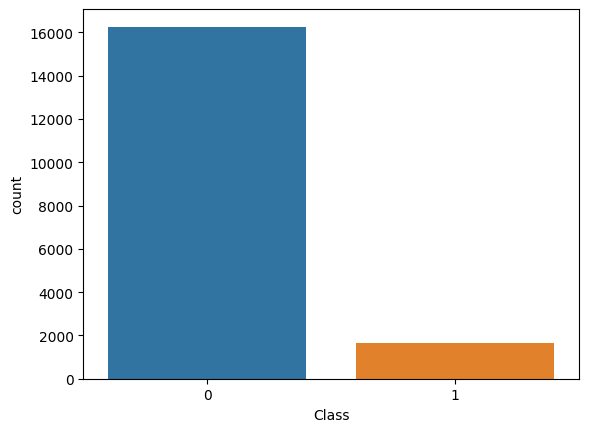

In [13]:
sns.countplot(x='Class', data=df)
plt.show()

In [14]:
class_proportions = df['Class'].value_counts(normalize=True)
print(class_proportions)

0    0.908426
1    0.091574
Name: Class, dtype: float64


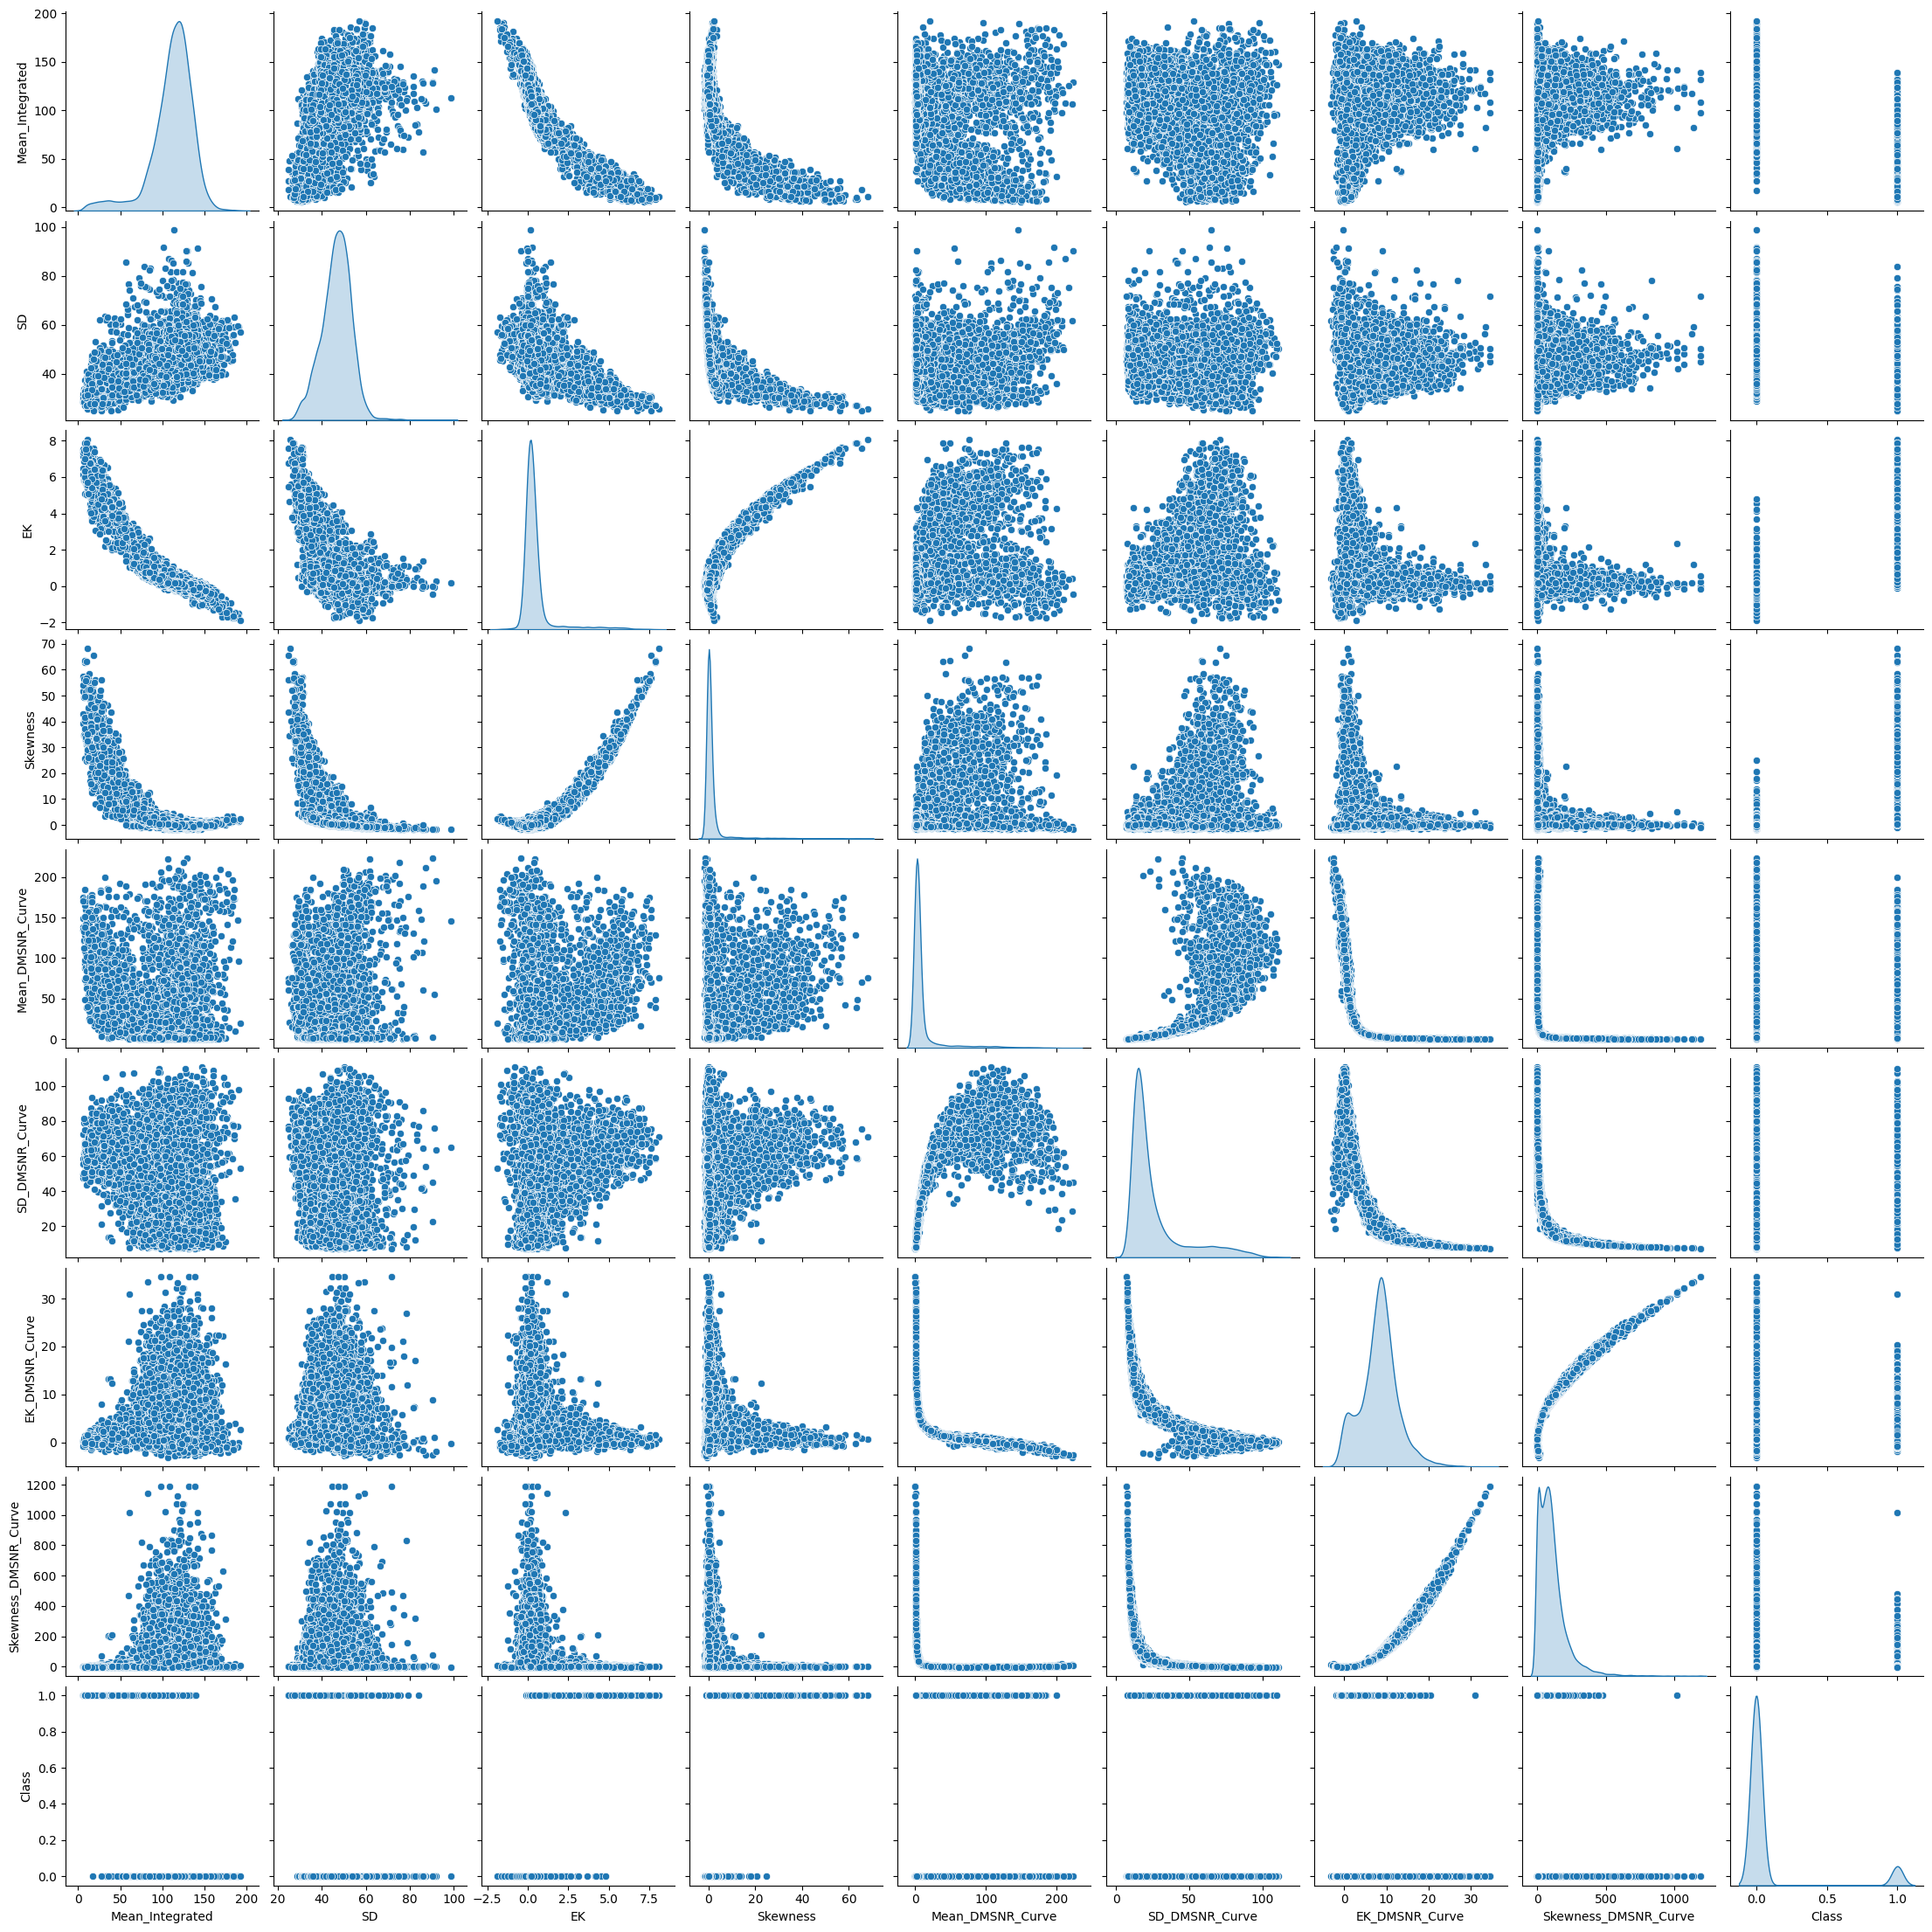

In [15]:
sns.pairplot(df, diag_kind="kde")
plt.show()

### Selección de variables

In [16]:
# Calcular la matriz de correlación
correlation_matrix = df.corr()

# Ordenar las correlaciones con respecto a la variable objetivo
correlation_with_target = correlation_matrix["Class"].abs().sort_values(ascending=False)

# Mostrar las variables más correlacionadas con la variable objetivo
print(correlation_with_target)

Class                   1.000000
EK                      0.791591
Skewness                0.709528
Mean_Integrated         0.673181
SD_DMSNR_Curve          0.491535
Mean_DMSNR_Curve        0.400876
EK_DMSNR_Curve          0.390816
SD                      0.363708
Skewness_DMSNR_Curve    0.259117
Name: Class, dtype: float64


In [44]:
# Variables predictoras (X)
X = df.drop(columns=['Class']).values
#Inicialmente parti con las que tienen mayor correlacion, pero tengo mejores resultados con todas las columnas en su conjunto, por eso deje todas.
#df[["EK", "Skewness", "Mean_Integrated", "SD_DMSNR_Curve"]]

# Variable objetivo (y)
y = df["Class"]

### Train/Val/Test split

In [45]:
def split_data(df):
    X = df.drop(columns=['Class'])
    y = df["Class"]
    X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2)
    return X_train, X_test, y_train, y_test

In [46]:
X_train, X_test, y_train, y_test = split_data(df)

### Se escalan los datos

In [64]:
#instancias para escalar modelo de regresion logistica
sc = StandardScaler()
# Aplicar la transformación de escala a los datos de entrenamiento
X_train_sc = sc.fit_transform(X_train.values)  # Se ajusta y transforma los datos de entrenamiento
# Realizar las transformaciones necesarias en los datos de prueba (por ejemplo, estandarización)
X_test_sc = sc.transform(X_test.values)

### Entrenamiento del modelo

In [65]:
def train_model(X_train, y_train, param_grid):
    #instancia LogisticRegression de scikit-learn para entrenar nuestro modelo
    logreg = LogisticRegression(max_iter=1000)
    #Realizar la búsqueda en la grilla de hiperparámetros con validación cruzada
    grid_search = GridSearchCV(logreg, param_grid, error_score='raise')
    grid_search.fit(X_train, y_train)
    # Obtener los mejores hiperparámetros y el mejor modelo
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_
    return best_model, best_params

In [66]:
param_grid = {'C': [0.1, 1.0, 10]}
best_model, best_params = train_model(X_train_sc, y_train, param_grid)
print("Mejores hiperparámetros:", best_params)

Mejores hiperparámetros: {'C': 10}


In [67]:
best_model

LogisticRegression(C=10, max_iter=1000)

In [68]:
def test_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = metrics.accuracy_score(y_test, y_pred)
    precision = metrics.precision_score(y_test, y_pred)
    recall = metrics.recall_score(y_test, y_pred)
    f1_score = metrics.f1_score(y_test, y_pred)

    print("##################\nTEST MODEL\n##################\n")
    print("##################\nAccuracy:", accuracy)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score)
    print("##################\n",metrics.classification_report(y_test,y_pred))
    confusion_matrix = metrics.confusion_matrix(y_test, y_pred)
    print("##################\nConfusion Matrix:\n", confusion_matrix)

In [69]:
test_model(best_model, X_test_sc, y_test)

##################
TEST MODEL
##################

##################
Accuracy: 0.9787709497206704
Precision: 0.9315068493150684
Recall: 0.8292682926829268
F1 Score: 0.8774193548387096
##################
               precision    recall  f1-score   support

           0       0.98      0.99      0.99      3252
           1       0.93      0.83      0.88       328

    accuracy                           0.98      3580
   macro avg       0.96      0.91      0.93      3580
weighted avg       0.98      0.98      0.98      3580

##################
Confusion Matrix:
 [[3232   20]
 [  56  272]]


In [70]:
def export(model, filename):
    with open(filename, 'wb') as f:
        pickle.dump(model, f)

In [71]:
model_filename = 'model.pkl'
scaler_filename = 'scaler.pkl'
export(best_model, model_filename)
export(sc, scaler_filename)